In [1]:
pip install networkx

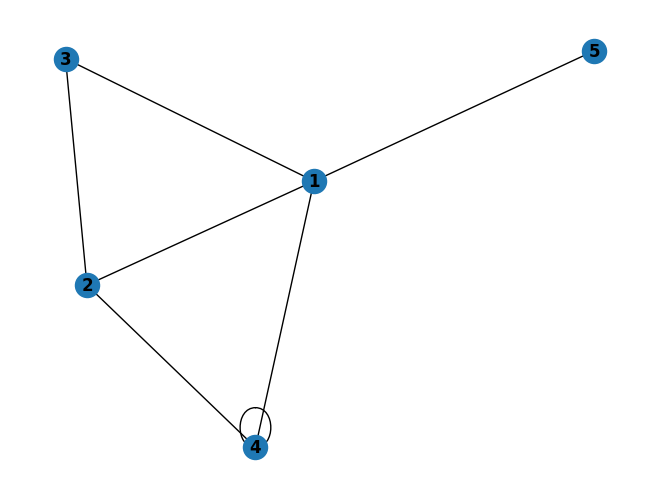

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from([1,2,3,4,5])

G.add_edges_from([(1,2),(1,3),(2,4),(1,4),(4,4),(3,2),(1,5)])

nx.draw(G,with_labels=True,font_weight='bold')
plt.show()

In [3]:
print('Total node',G.nodes())

Total node [1, 2, 3, 4, 5]


In [4]:
print("total edge",G.edges())

total edge [(1, 2), (1, 3), (1, 4), (1, 5), (2, 4), (2, 3), (4, 4)]


In [5]:
print(nx.is_connected(G))

True


In [6]:
shortest_path = nx.shortest_path(G,source = 4,target = 1)
print(shortest_path)

[4, 1]


In [7]:
degree_seq= G.degree()
print("Degree of each Node: ",degree_seq)

Degree of each Node:  [(1, 4), (2, 3), (3, 2), (4, 4), (5, 1)]


In [8]:
cluster_coefficent=nx.clustering(G)
print("Clustering Coefficient of each node: ", cluster_coefficent)

Clustering Coefficient of each node:  {1: 0.3333333333333333, 2: 0.6666666666666666, 3: 1.0, 4: 1.0, 5: 0}


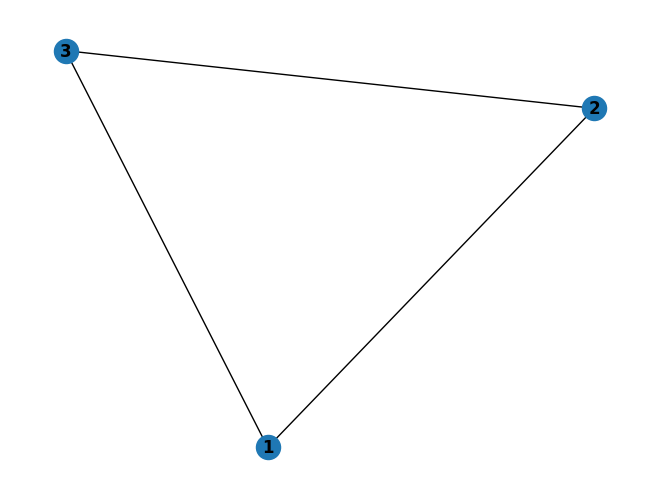

In [9]:
subgraph_nodes=[1,2,3]
subgraph= G.subgraph(subgraph_nodes)
nx.draw(subgraph, with_labels=True, font_weight='bold')

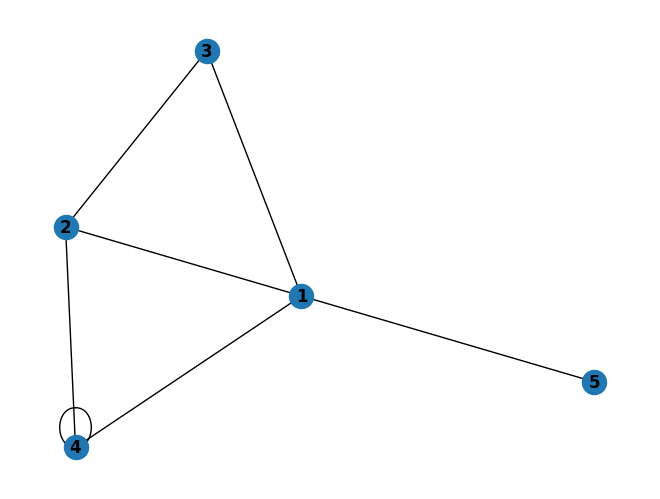

In [10]:
G_copy=G.copy()
nx.draw(G_copy, with_labels=True, font_weight='bold')

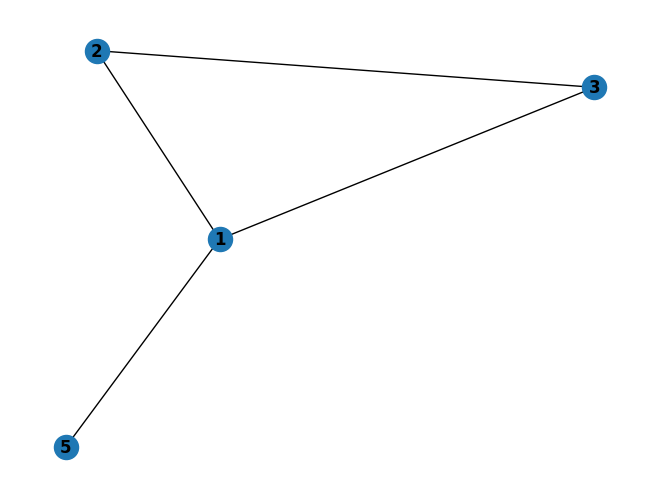

In [11]:

G_copy.remove_node(4)
nx.draw(G_copy, with_labels=True, font_weight='bold')
plt.show()

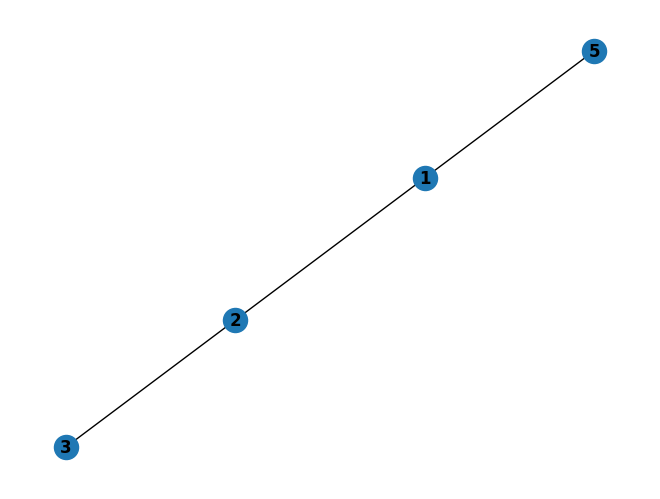

In [12]:
G_copy.remove_edge(1,3)
nx.draw(G_copy, with_labels=True, font_weight='bold')
plt.show()

Connected Components: [{1, 2, 3, 5}]


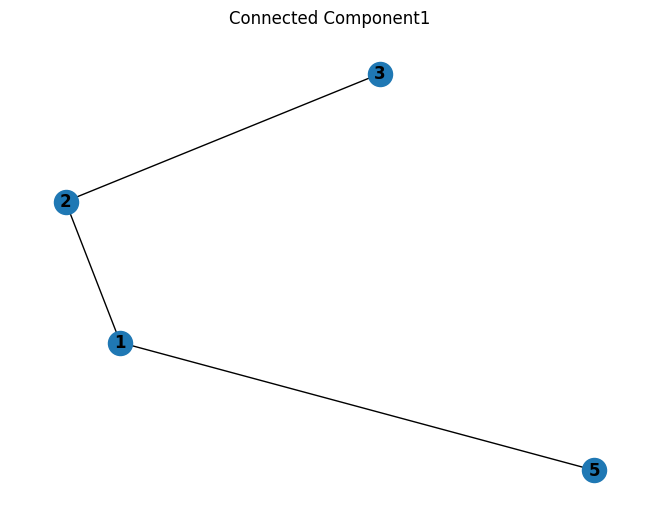

In [13]:
components=list(nx.connected_components(G_copy))
print("Connected Components:",components)

for i, component in enumerate(components):
  subgraph=G_copy.subgraph(component)
  plt.figure()
  nx.draw(subgraph, with_labels=True, font_weight='bold')
  plt.title(f"Connected Component{i+1}")
  plt.show()

In [14]:

density=nx.density(G)
print("Graph Density: ", density)

Graph Density:  0.7


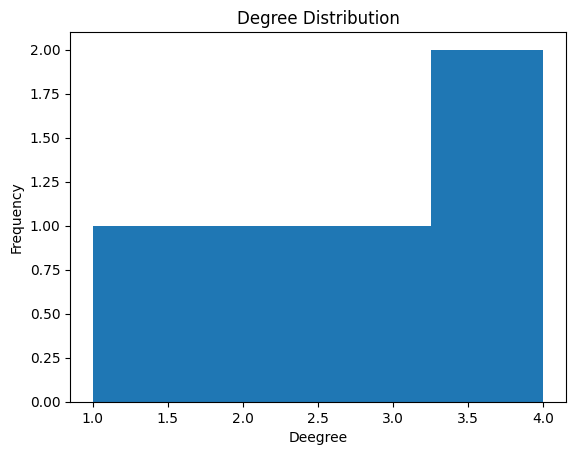

In [15]:
degree_sequence=[G.degree(node) for node in G. nodes()]
plt.hist(degree_sequence,bins='auto')
plt.title("Degree Distribution")
plt.xlabel("Deegree")
plt.ylabel("Frequency")
plt.show()

In [16]:

regions=list(nx.connected_components(G_copy))
G_copy.remove_node(3)
regions=list(nx.connected_components(G_copy))
print("Regions(Connected components):",regions)

Regions(Connected components): [{1, 2, 5}]


In [17]:
graph_length=nx.algorithms.distance_measures.diameter(G)
print("Length of the Graph (Diameter): ", graph_length)

Length of the Graph (Diameter):  2


In [18]:
ecentricity=nx.eccentricity(G)
print("Ecentricity of each Node: ", ecentricity)

Ecentricity of each Node:  {1: 1, 2: 2, 3: 2, 4: 2, 5: 2}


In [19]:
diameter=nx.diameter(G)
print("Diameter of the Graph: ",diameter)

Diameter of the Graph:  2


In [20]:
#radius
radius=nx.radius(G)
print("Radius of the Graph: ",radius)

Radius of the Graph:  1


In [21]:
#Center of the graph
center=nx.center(G)
print("Center of the Graph: ",center)

Center of the Graph:  [1]


In [22]:
#Peripheral Nodes of the Graph
peripheral= nx.periphery(G)
print("Peripheral Nodes of the graph: ", peripheral)

Peripheral Nodes of the graph:  [2, 3, 4, 5]


# **No. of degree any specific vertex**

In [23]:
print("Degree of node 2:", G.degree(2))


Degree of node 2: 3


# **Any cycle Exist or not**

In [24]:
print("Graph has cycle:", not nx.is_forest(G))


Graph has cycle: True


# **Connected Neighbors**

Adjacency list:
1 : [2, 3, 4, 5]
2 : [1, 4, 3]
3 : [1, 2]
4 : [2, 1, 4]
5 : [1]


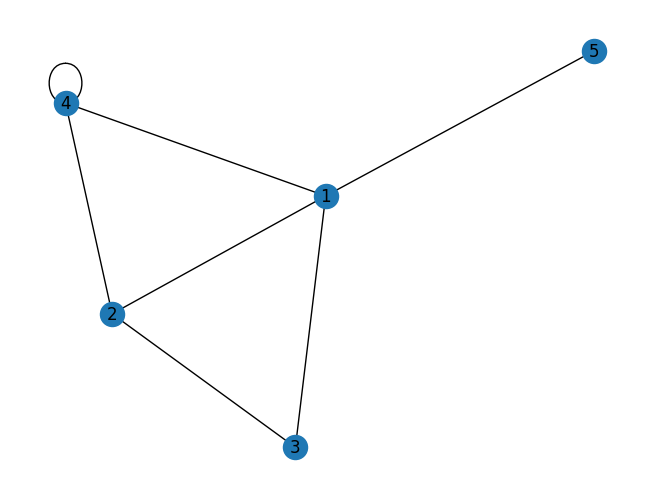

In [29]:
print("Adjacency list:")
for node in G.nodes():
    print(node, ":", list(G.neighbors(node)))

# **Planar or Non Planar**

In [30]:
V = G.number_of_nodes()
E = G.number_of_edges()

print("Vertices (V):", V)
print("Edges (E):", E)

if V >= 3:
    if E <= 3*V - 6:
        print("Condition satisfied: E ≤ 3V − 6")
        print("Graph CAN be planar")
    else:
        print("Condition violated: E > 3V − 6")
        print("Graph is NON-PLANAR")
else:
    print("Graph is planar (V < 3)")


Vertices (V): 5
Edges (E): 7
Condition satisfied: E ≤ 3V − 6
Graph CAN be planar


In [32]:
sum_deg = sum(dict(G.degree()).values())
print("Sum of degrees:", sum_deg)
print("2 * number of edges:", 2 * G.number_of_edges())

Sum of degrees: 0
2 * number of edges: 0


# **Handshaking Theorem**

In [35]:
import networkx as nx

G1 = nx.Graph()

G1.add_nodes_from([1, 2, 3, 4, 5])

G1.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

sum_deg = sum(dict(G1.degree()).values())

print("\n--- Handshaking Lemma Verification ---")
print("Sum of degrees of all vertices:", sum_deg)
print("2 * number of edges:", 2 * G1.number_of_edges())

# Verify
if sum_deg == 2 * G1.number_of_edges():
    print("Handshaking")
else:
    print("No Handshaking")



--- Handshaking Lemma Verification ---
Sum of degrees of all vertices: 10
2 * number of edges: 10
Handshaking


# **radius <= diameter <= 2*radius**

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Remove self-loops for radius/diameter calculation
G_simple = nx.Graph(G)  # make a copy
G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

# Check if the graph is connected
if nx.is_connected(G_simple):
    # Compute eccentricity
    ecc = nx.eccentricity(G_simple)
    print("Eccentricities of nodes:", ecc)

    # Radius and Diameter
    radius = nx.radius(G_simple)
    diameter = nx.diameter(G_simple)
    print("\nRadius of G:", radius)
    print("Diameter of G:", diameter)
    print("2 * Radius:", 2 * radius)

    # Verify theorem
    if radius <= diameter <= 2 * radius:
        print("The inequality holds: radius <= diameter <= 2*radius ")
    else:
        print("The inequality does NOT hold ")



Eccentricities of nodes: {1: 1, 2: 2, 3: 2, 4: 2, 5: 2}

Radius of G: 1
Diameter of G: 2
2 * Radius: 2
The inequality holds: radius <= diameter <= 2*radius 


# **K5 graph**

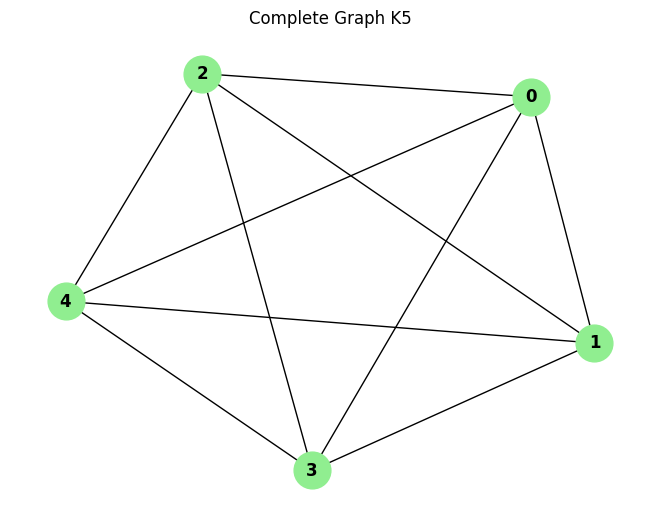

Nodes: [0, 1, 2, 3, 4]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

Sum of degrees: 20
2 * number of edges: 20
Handshaking Lemma holds 

Radius of K5: 1
Diameter of K5: 1
Inequality check: radius <= diameter <= 2*radius 


In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a complete graph K5
K5 = nx.complete_graph(5)  # nodes are 0,1,2,3,4

# Draw the graph
nx.draw(K5, with_labels=True, node_color='lightgreen', node_size=700, font_weight='bold')
plt.title("Complete Graph K5")
plt.show()

# Print nodes and edges
print("Nodes:", K5.nodes())
print("Edges:", K5.edges())

# Handshaking Lemma
sum_deg = sum(dict(K5.degree()).values())
num_edges = K5.number_of_edges()
print("\nSum of degrees:", sum_deg)
print("2 * number of edges:", 2 * num_edges)
print("Handshaking Lemma holds " if sum_deg == 2*num_edges else "Something is wrong ")

# Radius and Diameter
if nx.is_connected(K5):
    radius = nx.radius(K5)
    diameter = nx.diameter(K5)
    print("\nRadius of K5:", radius)
    print("Diameter of K5:", diameter)
    print("Inequality check: radius <= diameter <= 2*radius " if radius <= diameter <= 2*radius else "wrong")


# **Proved Euler Formula**

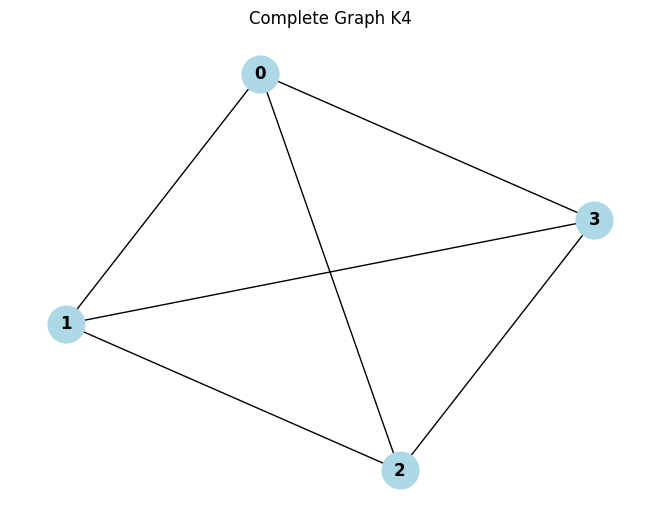

Graph is planar 
Vertices (V): 4
Edges (E): 6
Faces (F): 4
Euler formula check: V - E + F = 2
Euler's formula holds 


In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Create K4
K4 = nx.complete_graph(4)  # nodes: 0,1,2,3

# Draw the graph
nx.draw(K4, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold')
plt.title("Complete Graph K4")
plt.show()

# Number of vertices and edges
V = K4.number_of_nodes()   # 4 vertices
E = K4.number_of_edges()   # 6 edges

# Since K4 is known to be planar, apply Euler's formula directly
F = 2 - V + E   # Number of faces

print("Graph is planar ")
print("Vertices (V):", V)
print("Edges (E):", E)
print("Faces (F):", F)
print("Euler formula check: V - E + F =", V - E + F)

# Verify Euler's formula
if V - E + F == 2:
    print("Euler's formula holds ")
else:
    print("Euler's formula does NOT hold ")
